<a href="https://colab.research.google.com/github/Youssefx14/titanic-data-analysis-ml/blob/main/Titanic_EDA_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

* Data Dictionary

| Feature | Definition | Key |
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them.




# Importing Libraries

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring the Data

In [473]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [474]:
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Unuseful Features : `PassengerId, Name and Ticket` >> To be dropped
* Categorical Features: `Sex, Pclass, SibSp, Parch and Embarked `
* Numerical Features : `Age and Fare`
* Target : `Survived`

In [475]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [477]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Duplicate Values

In [478]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

>If there are any duplicates, we will drop them:

         df.drop_duplicates(inplace=True)

# Missing Values

In [479]:
# Check Missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [480]:
round(df.isna().mean() * 100 ,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


* Missing Values can be dropped or imputed.
* If Missing Values are less than 5% of the total data, we can drop ***Rows***.
* If Missing Values are more than 40% of the total data, we can drop ***Column***.
* Otherwise, we can impute them
        
        ( Not a rule of thumb, but a good practice)

In [481]:
df['Embarked'].describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [482]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [483]:
df['Embarked'].mode()

,Embarked
0,S


In [484]:
df['Embarked'].mode()[0]

'S'

In [485]:
df['Embarked'] = df['Embarked'].fillna('S')


In [486]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

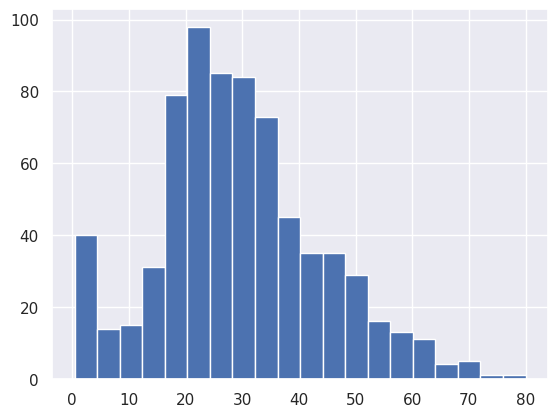

In [487]:
df.Age.hist(bins=20)

In [488]:
#df.Age.fillna(df.Age.median(), inplace=True)  # Not the optimal way to fill missing values

* We can try to impute the missing values according to a relation between the missing feature and other features.
* For example, we can impute the missing values of `Age` according to the `Pclass` and `Sex` of the passenger.
* We can also use KNN imputation to impute the missing values.

In [489]:
df[df['Sex'] == 'female'].Age.median()

27.0

In [490]:
df[df['Sex'] == 'male'].Age.median()

29.0

In [491]:
print(df[df['Pclass'] == 1].Age.median())
print(df[df['Pclass'] == 2].Age.median())
print(df[df['Pclass'] == 3].Age.median())

37.0
29.0
24.0


In [492]:
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')].Age.median())

35.0
40.0
28.0
30.0
21.5
25.0


In [493]:
# Fill missing values in Age column by median grouping by class and sex

def fill_age(pclass, sex):

    if pclass == 1:
        if sex == 'female':
            return 35
        else:
            return 40
    elif pclass == 2:
        if sex == 'female':
            return 28
        else:
            return 30
    else:
        if sex == 'female':
            return 21.5
        else:
            return 25

df['age2'] = df['Age'].fillna(lambda x : fill_age(x['Pclass'], x['Sex']))


In [494]:
# filling missing values of age based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [495]:
(df.age2 == df.Age ).all()

np.False_

In [496]:
del df['age2']

In [497]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Using KNN Imputation

    ```
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=2)
    df[['Age']] = imputer.fit_transform(df[['Age']])
    ```

>

In [498]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Drop Columns

In [499]:
# Drop Unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename Columns

In [500]:
# Rename Columns
#df.rename(columns={'Survived': 'survived', 'Pclass': 'pclass', 'SibSp': 'brothers', 'Parch': 'parch'}, inplace=True)
df.columns = df.columns.str.lower()

# Create New Feature "family_size"

In [501]:
df['family_size'] = df['sibsp'] + df['parch']

In [502]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
107,1,3,male,25.0,0,0,7.775,S,0


# Univariate Analysis

In [503]:
df.survived.value_counts()

,count
survived,
0,549
1,342


In [504]:
df.survived.value_counts() / len(df)   # shape[0]

,count
survived,
0,0.616162
1,0.383838


In [505]:
df.survived.value_counts(normalize=True)

,proportion
survived,
0,0.616162
1,0.383838


        Suvival Rate : 38.38%

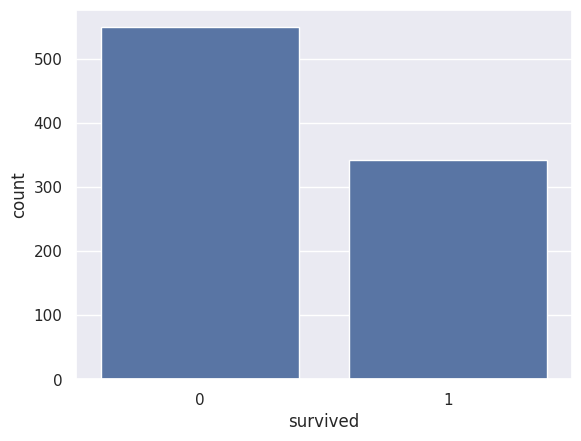

In [506]:
sns.countplot(x='survived', data=df);

In [507]:
df.pclass.value_counts(normalize=True)

,proportion
pclass,
3,0.551066
1,0.242424
2,0.206510


        More than 55% of the passengers were from 3rd class

In [508]:
df.sibsp.value_counts(normalize=True)

,proportion
sibsp,
0,0.682379
1,0.234568
2,0.031425
4,0.020202
3,0.017957
8,0.007856
5,0.005612


        More than 68% of the passengers had no siblings or spouse

In [509]:
def explore_categorical(df, col):
    print(f'### {col} ###')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

### pclass ###
pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


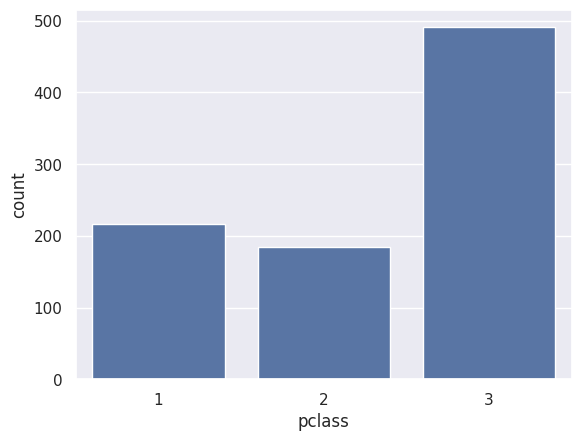

### sibsp ###
sibsp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64


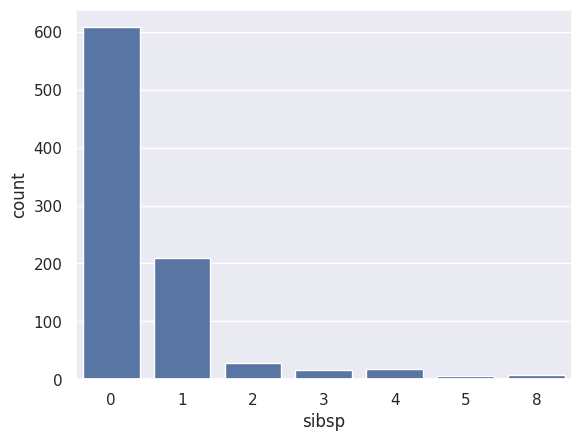

### parch ###
parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64


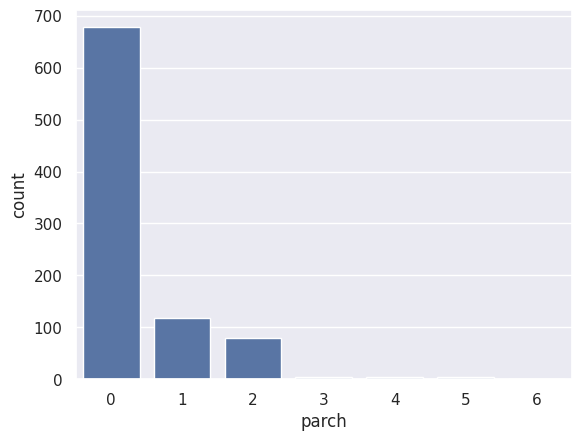

### embarked ###
embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


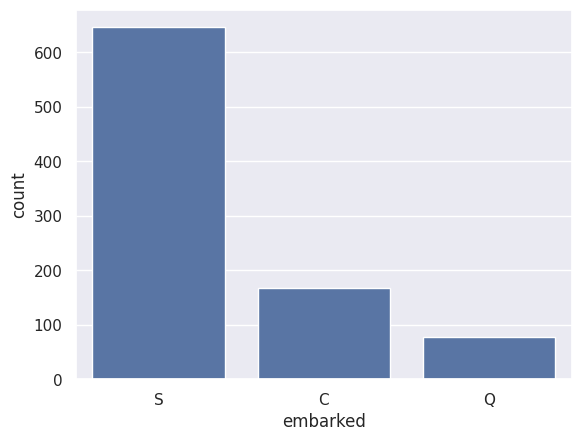

### sex ###
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


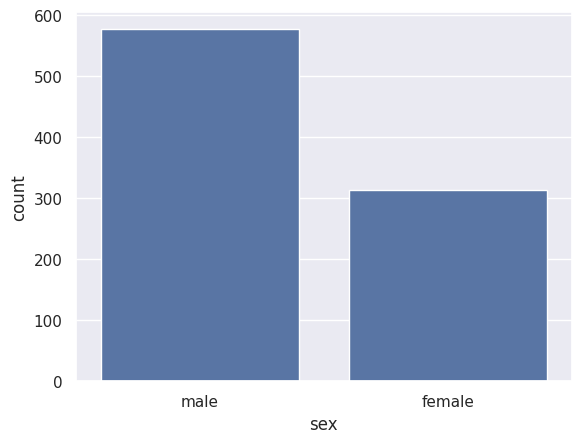

### family_size ###
family_size
0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: proportion, dtype: float64


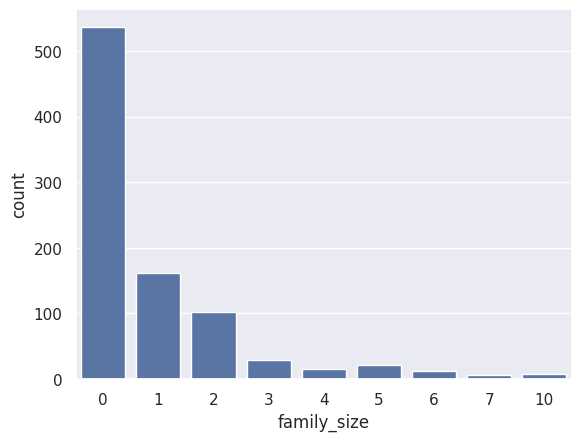

In [510]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex', 'family_size']:
    explore_categorical(df, col)

In [511]:
def explore_continuous(df, col):
    print(f'### {col} ###')
    print(df[col].describe())
    sns.histplot(x=col, data=df);
    plt.show()

### age ###
count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


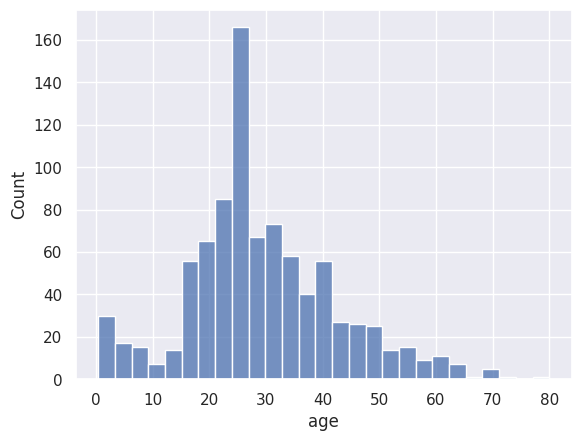

### fare ###
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


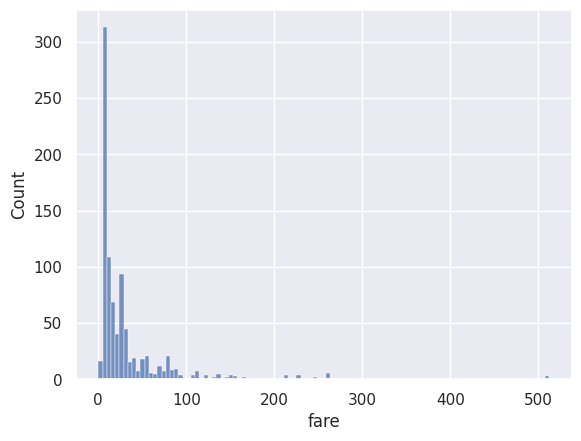

In [512]:
for col in ['age', 'fare']:
    explore_continuous(df, col)


# Bivariate Analysis

In [513]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
565,0,3,male,24.0,2,0,24.15,S,2


In [514]:
df.groupby('pclass').survived.mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


        The higher the class, the higher the survival rate

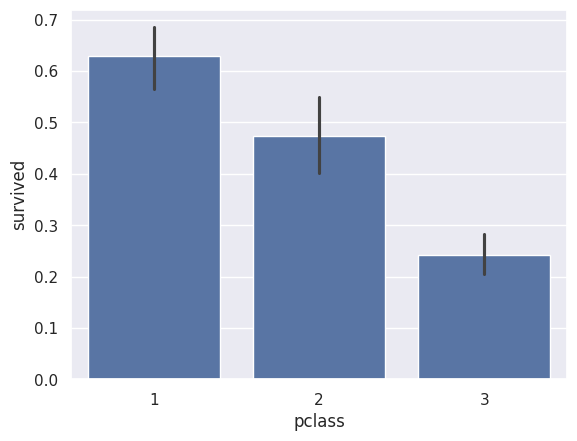

In [515]:
# plot class vs survived
sns.barplot(x='pclass', y='survived', data=df);

/tmp/ipython-input-3650877100.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None);


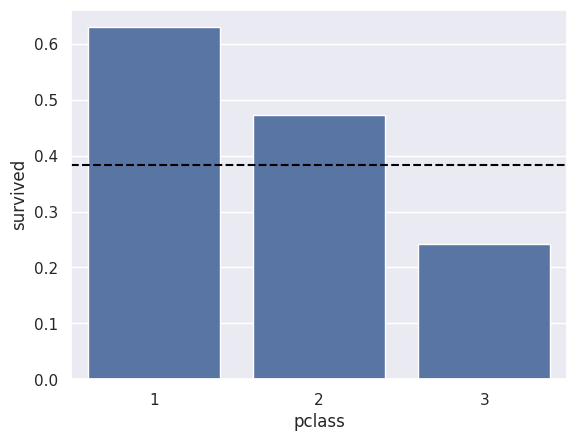

In [516]:
sns.barplot(x='pclass', y='survived', data=df, ci=None);
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='--');
plt.show()

In [517]:
# Survival rate for each group
def survival_rate(df, col):
    print(df.groupby(col).survived.mean())
    sns.barplot(x=col, y='survived', data=df, ci=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


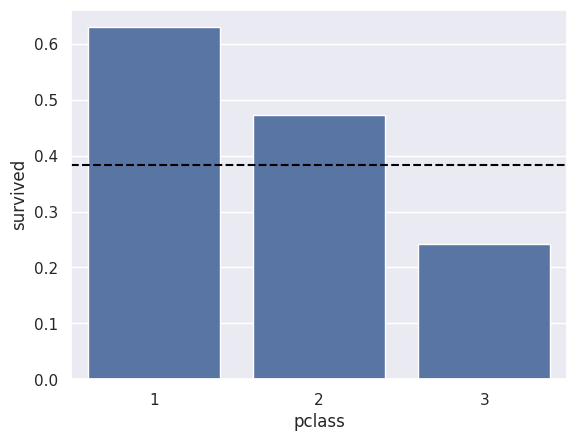

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


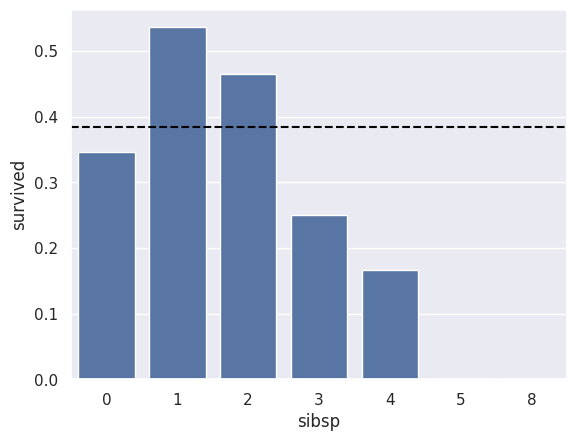

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


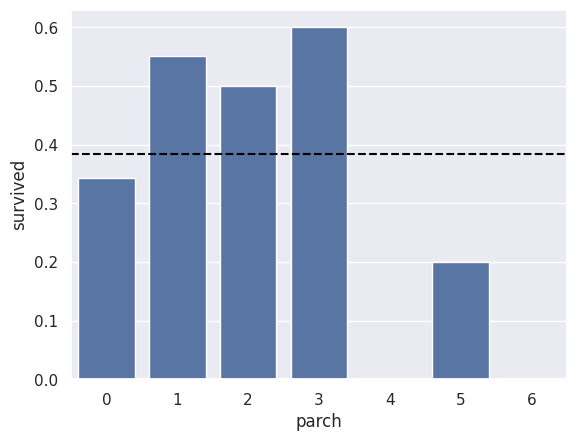

embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


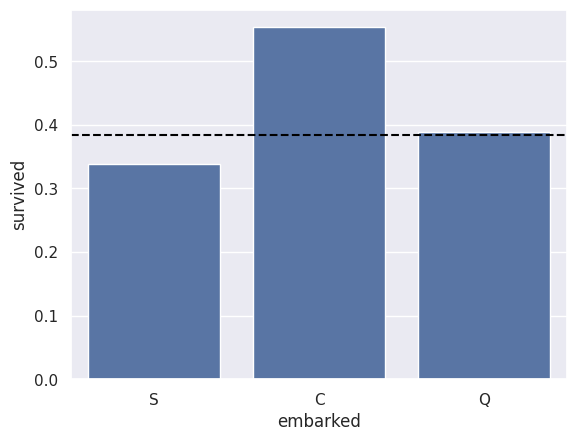

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


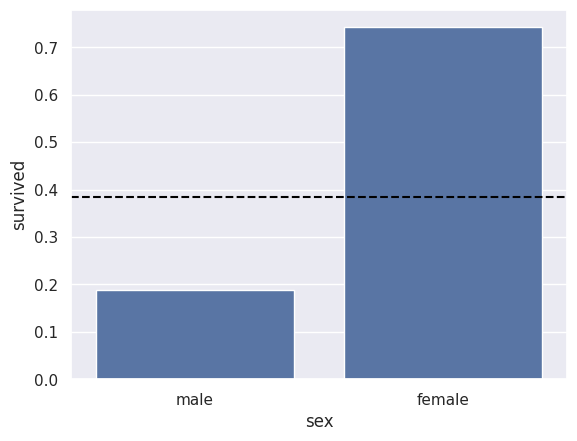

family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


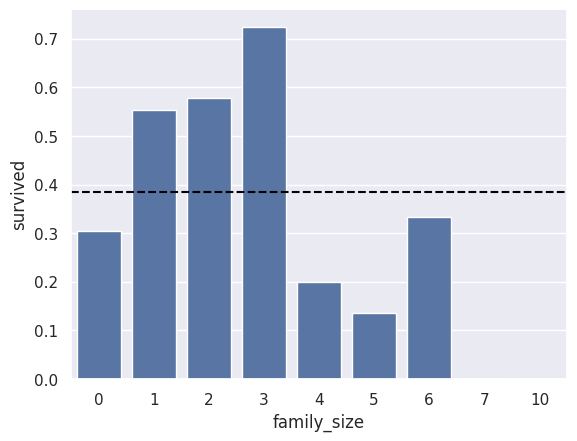

In [518]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex', 'family_size']:
    survival_rate(df, col)

* How many passengers were alone? What is their Survival Rate ?

In [519]:
df[df['family_size'] ==0].shape[0]

537

In [520]:
df[df['family_size'] ==0].count()

,0
survived,537
pclass,537
sex,537
age,537
sibsp,537
parch,537
fare,537
embarked,537
family_size,537


In [521]:
df[df['family_size'] ==0]['family_size'].count()

np.int64(537)

In [522]:
df['family_size'].value_counts()

,count
family_size,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [523]:
df['family_size'].value_counts()[0]

np.int64(537)

In [524]:
df['family_size'].value_counts().loc[0]

np.int64(537)

In [525]:
df['family_size'].value_counts(normalize= True)[0]

np.float64(0.6026936026936027)

In [526]:
df[df['family_size'] ==0].survived.mean()

np.float64(0.30353817504655495)

* What are top 3 categories from "family_size" have highest survival Rate ?

In [527]:
df.groupby('family_size').survived.mean()

,survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [528]:
df.groupby('family_size').survived.mean().sort_values()

,survived
family_size,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


In [529]:
df.groupby('family_size').survived.mean().sort_values(ascending = False)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [530]:
df.groupby('family_size').survived.mean().sort_values(ascending = False).head(3)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795


In [531]:
df.groupby('family_size').survived.mean().nlargest(3)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795


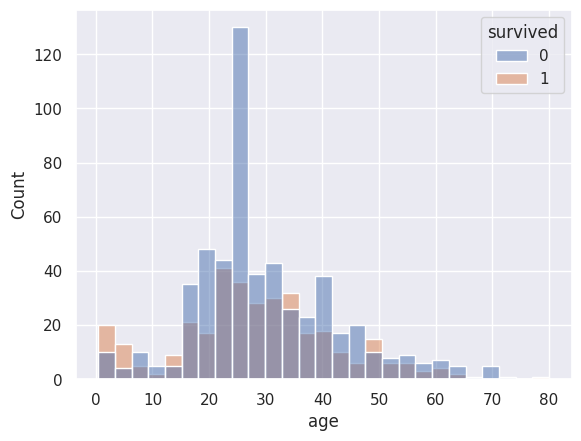

In [532]:
sns.histplot(x='age', data=df, hue='survived');

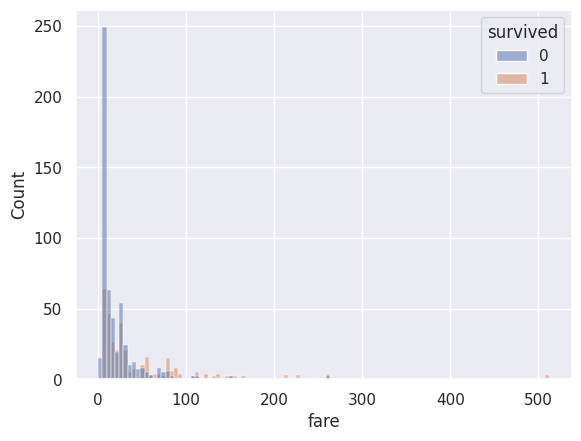

In [533]:
sns.histplot(x='fare', data=df, hue='survived');

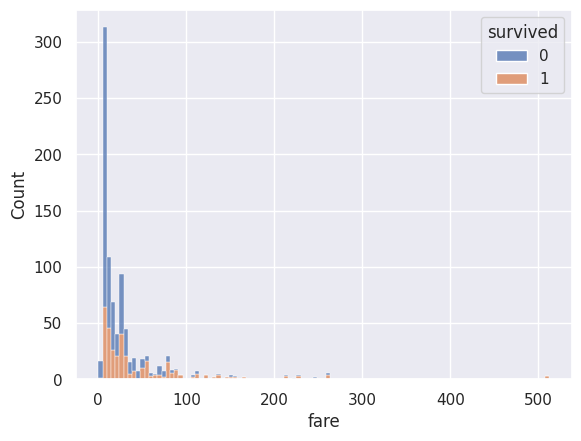

In [534]:
sns.histplot(x='fare', data=df, hue='survived', multiple='stack');

In [535]:
df_survived = df[df.survived == 1]
df_died = df[df.survived == 0]

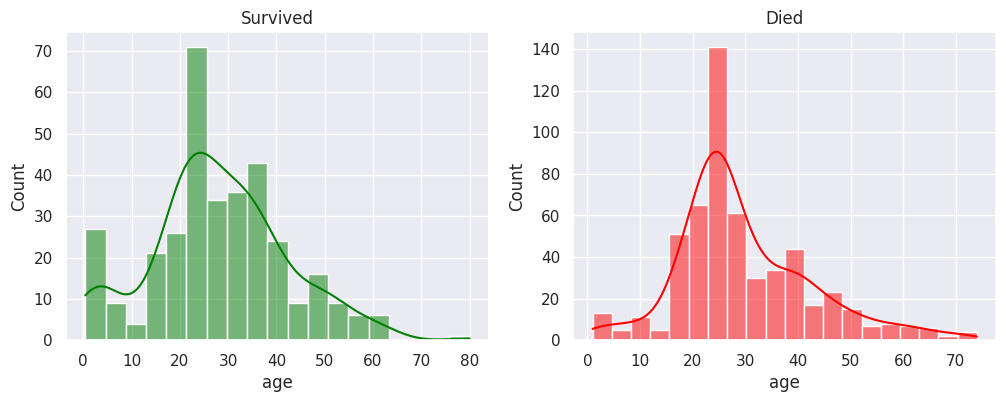

In [536]:
# Subplots for age distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='age', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

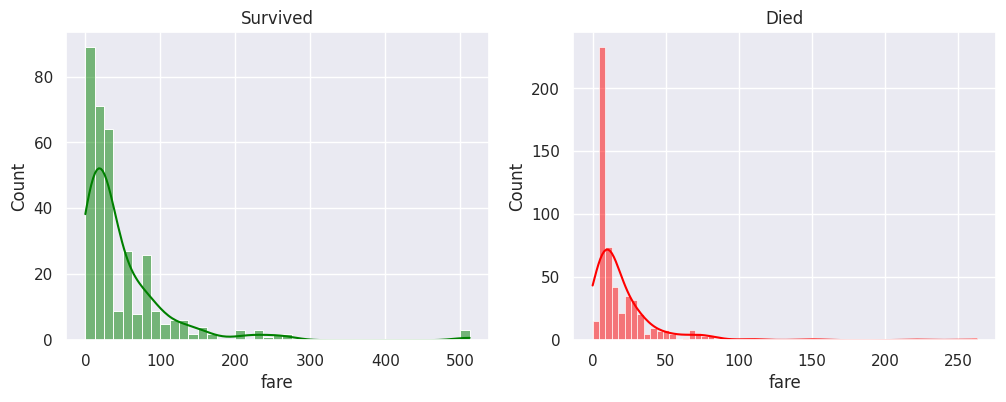

In [537]:
# Subplots for fare distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='fare', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='fare', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

In [538]:
df.describe()[['age', 'fare']]

,age,fare
count,891.000000,891.000000
mean,29.112424,32.204208
std,13.304424,49.693429
min,0.420000,0.000000
25%,21.500000,7.910400
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


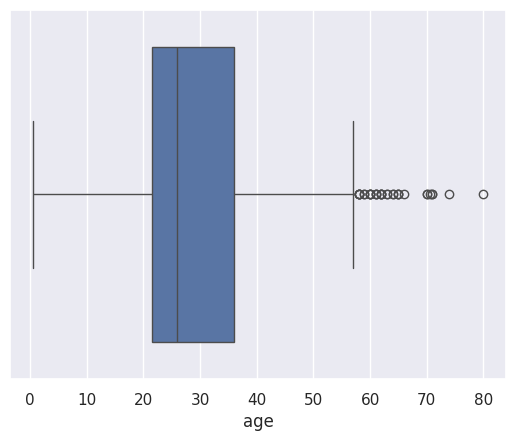

In [539]:
sns.boxplot( x='age', data=df);

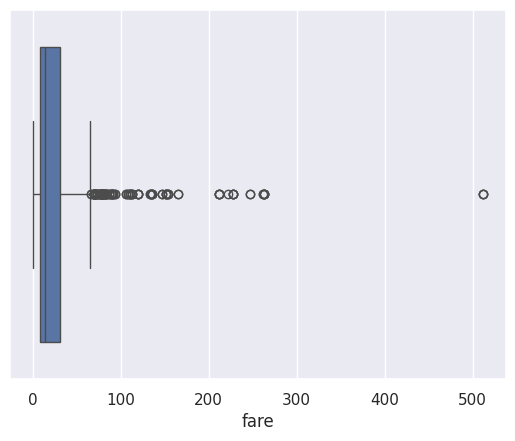

In [540]:
sns.boxplot( x='fare', data=df);

            Many outliers in the fare
* We can use the IQR method to remove them.
* We can also choose a limit according to the distribution of the data.


# Outliers Detection

In [541]:
# Remove outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [542]:
df = df[df.fare < 300]
# df = remove_outliers(df, 'fare')

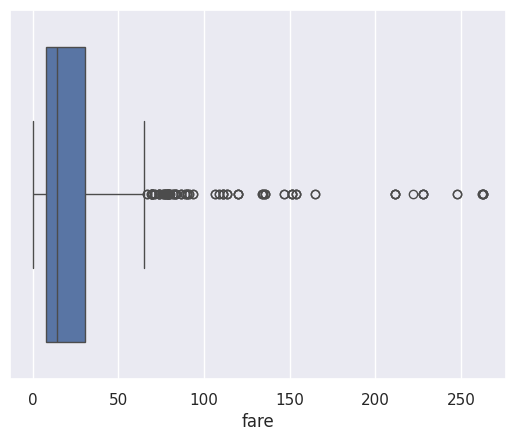

In [543]:
sns.boxplot( x='fare', data=df);

In [544]:
df.fare.describe()

,fare
count,888.000000
mean,30.582164
std,41.176366
min,0.000000
25%,7.895800
50%,14.454200
75%,30.771850
max,263.000000


In [545]:
# Split Age into groups
df['age_group'] = pd.cut(df.age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

age_group
child     0.450549
young     0.260000
adult     0.427184
senior    0.363636
Name: survived, dtype: float64


/tmp/ipython-input-2779290449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean())
/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


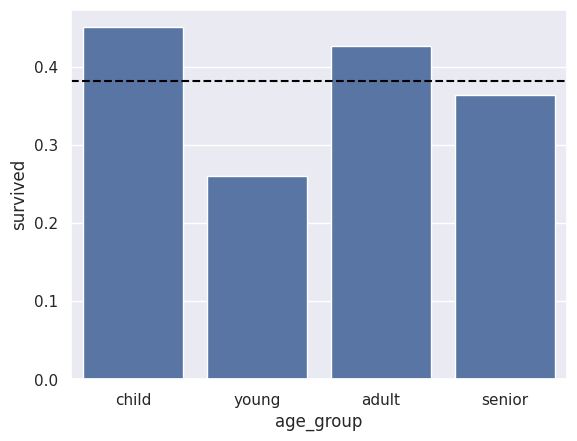

/tmp/ipython-input-2779290449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean())
/tmp/ipython-input-2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


fare_group
low          0.215768
medium       0.285714
high         0.446809
very high    0.615385
Name: survived, dtype: float64


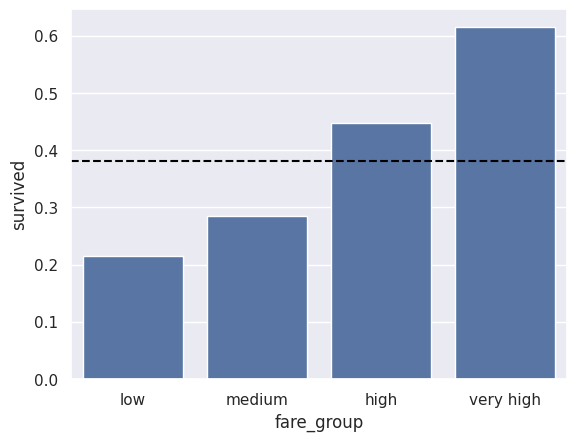

In [546]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

# Multivariate Analysis

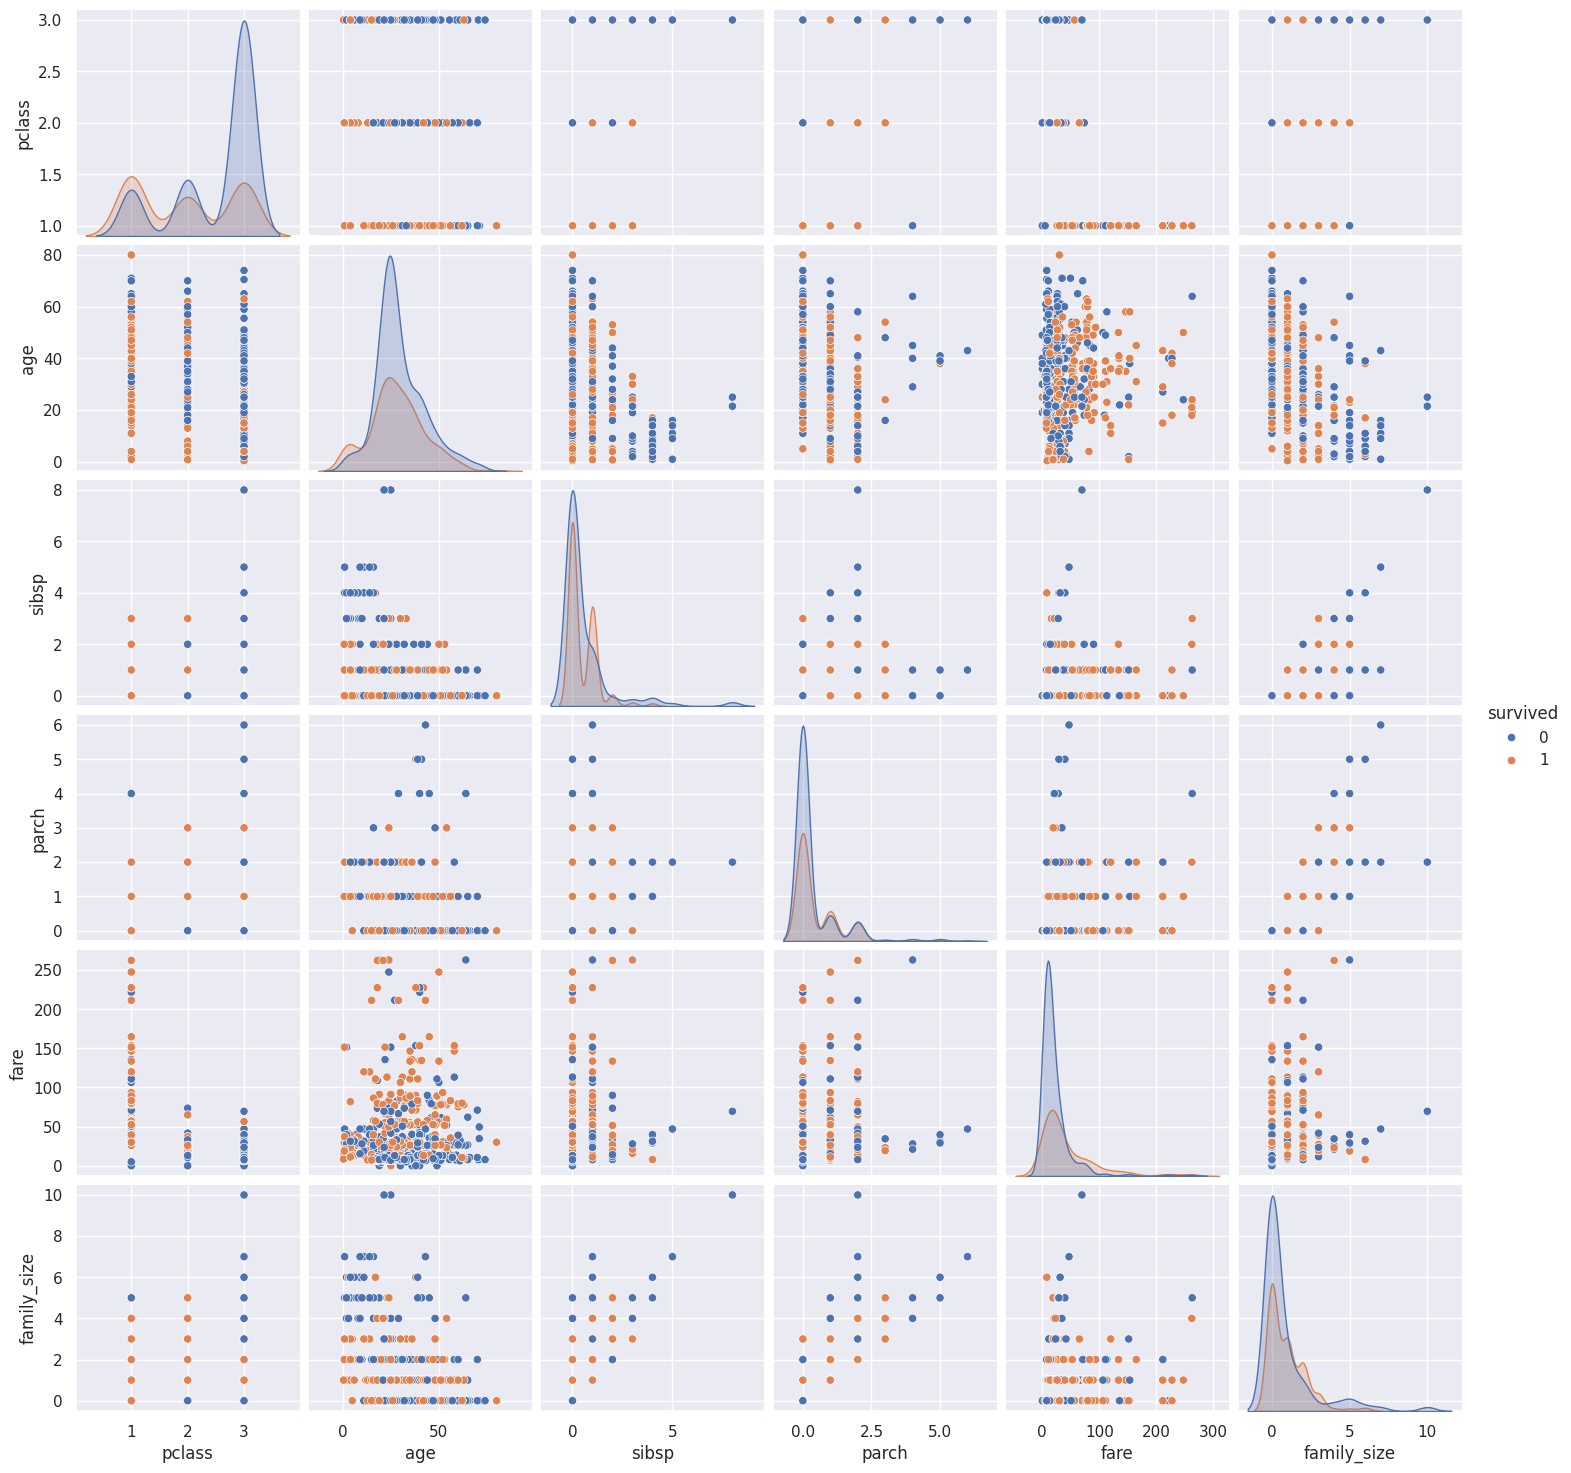

In [547]:
sns.pairplot(df, hue='survived');

In [548]:
df.corr(numeric_only=True)['survived']

,survived
survived,1.000000
pclass,-0.334068
age,-0.061773
sibsp,-0.033395
parch,0.082157
fare,0.261742
family_size,0.018211


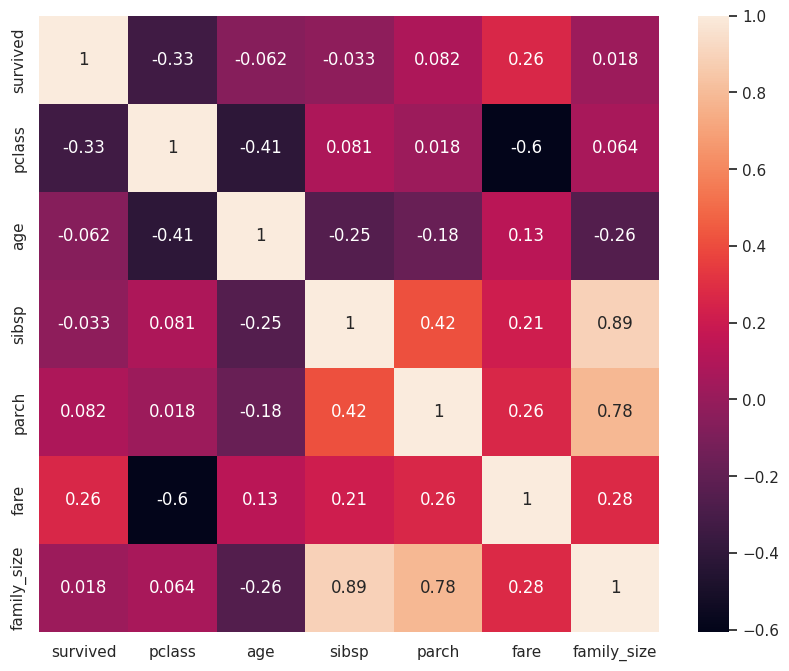

In [549]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

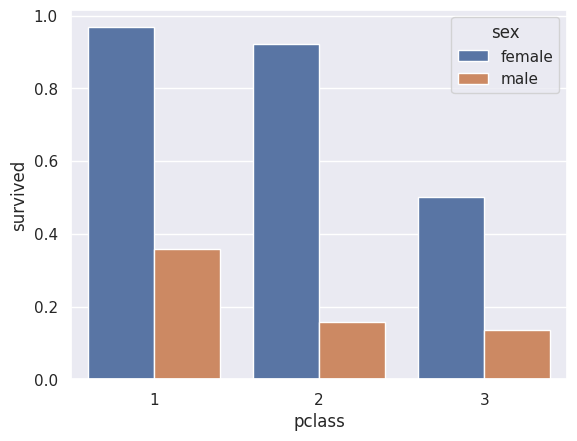

In [550]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, errorbar=None);

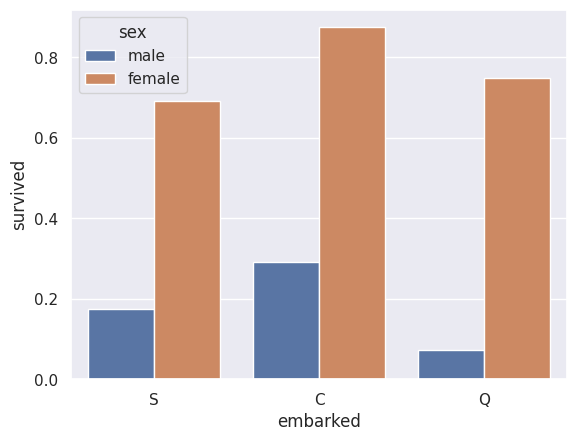

In [551]:
sns.barplot(x='embarked', y='survived', hue='sex', data=df, errorbar=None);



# Conclusion

/tmp/ipython-input-1369347008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-1369347008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-1369347008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-1369347008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-1369347008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i

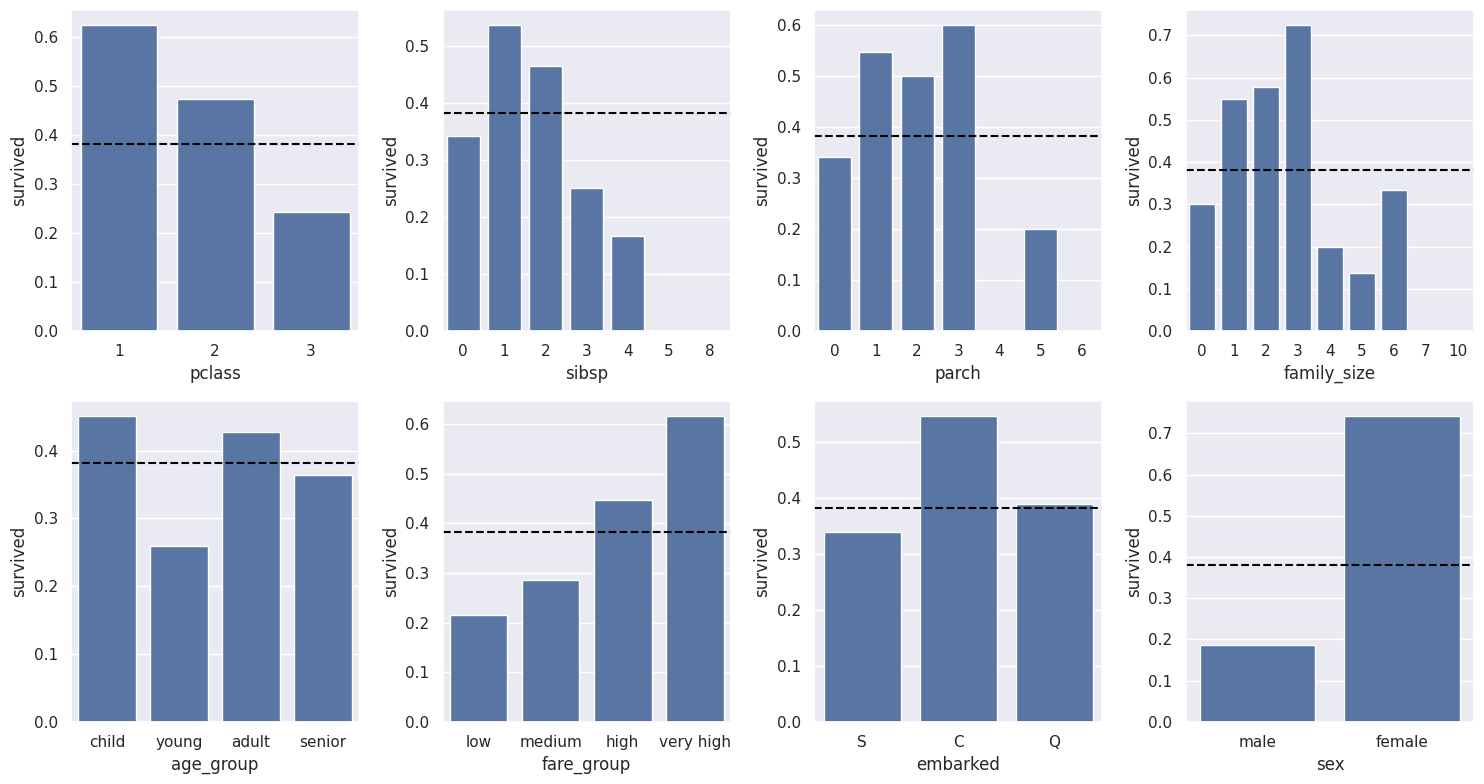

In [552]:
# 8 Subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'family_size', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()



In [553]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

In [554]:
female_df.survived.value_counts(normalize=True)

,proportion
survived,
1,0.741214
0,0.258786


In [555]:
female_df.groupby('pclass').survived.mean()

,survived
pclass,
1,0.967742
2,0.921053
3,0.500000


/tmp/ipython-input-3474947662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=female_df, ci=None);


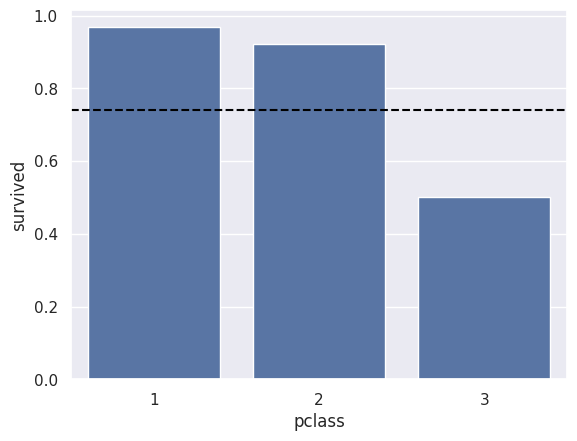

In [556]:
sns.barplot(x='pclass', y='survived', data=female_df, ci=None);
plt.axhline(female_df.survived.mean(), color='black', linestyle='--')
plt.show()

In [557]:
male_df.survived.value_counts(normalize=True)

,proportion
survived,
0,0.813913
1,0.186087


In [558]:
male_df.groupby('pclass').survived.mean()

,survived
pclass,
1,0.358333
2,0.157407
3,0.135447


/tmp/ipython-input-2591017502.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=male_df, ci=None);


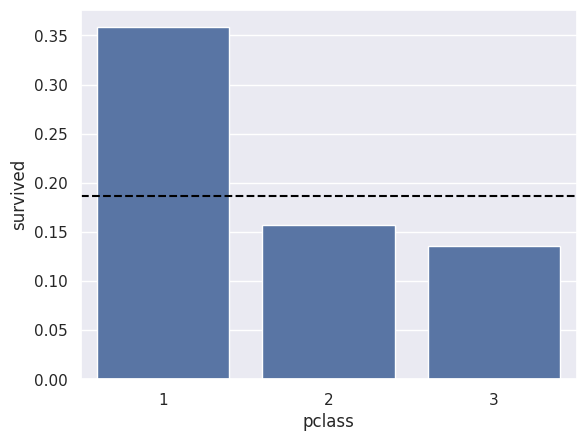

In [559]:
sns.barplot(x='pclass', y='survived', data=male_df, ci=None);
plt.axhline(male_df.survived.mean(), color='black', linestyle='--')

In [560]:
sex_class = pd.merge(female_df.groupby('pclass').survived.mean(), male_df.groupby('pclass').survived.mean(), on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.967742,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [561]:
sex_class.rename(columns= {'survived_x': 'female_survived', 'survived_y': 'male_survived'}, inplace=True)

In [562]:
sex_class

,female_survived,male_survived
pclass,,
1,0.967742,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [563]:
df.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.967742
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [564]:
df.groupby(['age_group', 'sex']).survived.mean()

/tmp/ipython-input-3661586720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'sex']).survived.mean()


age_group  sex   
child      female    0.666667
           male      0.229630
young      female    0.756757
           male      0.147239
adult      female    0.849315
           male      0.195489
senior     female    0.769231
           male      0.180556
Name: survived, dtype: float64

In [565]:
pd.DataFrame(df.groupby(['age_group', 'sex']).survived.mean())

/tmp/ipython-input-473387967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby(['age_group', 'sex']).survived.mean())


survived
age_group sex             
child     female  0.666667
          male    0.229630
young     female  0.756757
          male    0.147239
adult     female  0.849315
          male    0.195489
senior    female  0.769231
          male    0.180556

In [566]:
pd.DataFrame(df.groupby(['sex', 'age_group']).survived.mean())

/tmp/ipython-input-2215654362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby(['sex', 'age_group']).survived.mean())


survived
sex    age_group          
female child      0.666667
       young      0.756757
       adult      0.849315
       senior     0.769231
male   child      0.229630
       young      0.147239
       adult      0.195489
       senior     0.180556

In [567]:
age_sex = pd.DataFrame(df.groupby(['age_group', 'sex']).survived.mean()).sort_values(by='survived')
age_sex

/tmp/ipython-input-695271274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex = pd.DataFrame(df.groupby(['age_group', 'sex']).survived.mean()).sort_values(by='survived')


survived
age_group sex             
young     male    0.147239
senior    male    0.180556
adult     male    0.195489
child     male    0.229630
          female  0.666667
young     female  0.756757
senior    female  0.769231
adult     female  0.849315

In [568]:
age_sex = age_sex.reset_index()
age_sex

,age_group,sex,survived
0,young,male,0.147239
1,senior,male,0.180556
2,adult,male,0.195489
3,child,male,0.229630
4,child,female,0.666667
5,young,female,0.756757
6,senior,female,0.769231
7,adult,female,0.849315


In [569]:
age_sex[age_sex['sex']== 'female']

,age_group,sex,survived
4,child,female,0.666667
5,young,female,0.756757
6,senior,female,0.769231
7,adult,female,0.849315


In [570]:
age_sex[age_sex['sex']== 'female'].iloc[0]

,4
age_group,child
sex,female
survived,0.666667


In [571]:
age_sex[age_sex['sex']== 'female'].iloc[0]['age_group']

'child'

In [572]:
age_sex[age_sex['sex']== 'female'].iloc[-1]

,7
age_group,adult
sex,female
survived,0.849315


In [573]:
age_sex[age_sex['sex']== 'female'].iloc[-1]['age_group']

'adult'

In [574]:
age_sex[age_sex['sex']== 'male'].iloc[0]['age_group']

'young'

In [575]:
age_sex[age_sex['sex']== 'male'].iloc[-1]['age_group']

'child'

# Insights



* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* Females had a higher survival rate